<a href="https://colab.research.google.com/github/amirhosseinzinati/google-Stuck-Prediction-using-RNN/blob/main/Google_Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [54]:
#import libraries
import math
import numpy as np
import pandas as pd
import pandas_datareader as web
import yfinance as yf
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM , Dense , Dropout
from sklearn.preprocessing import MinMaxScaler 

plt.style.use('fivethirtyeight')

In [101]:
df = yf.download('GOOG', start='2016-06-14', end='2023-02-09')
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-06-14,35.824001,36.123501,35.655998,35.913502,35.913502,26122000
2016-06-15,35.950001,36.148998,35.865501,35.945999,35.945999,24290000
2016-06-16,35.745499,35.832500,35.162998,35.518002,35.518002,39650000
2016-06-17,35.432499,35.441002,34.422600,34.585999,34.585999,68048000
2016-06-20,34.938499,35.124001,34.670502,34.685501,34.685501,41650000


In [102]:
# Get the number of rows and columns in dataset
df.shape

(1676, 6)

Text(0, 0.5, 'Close Price')

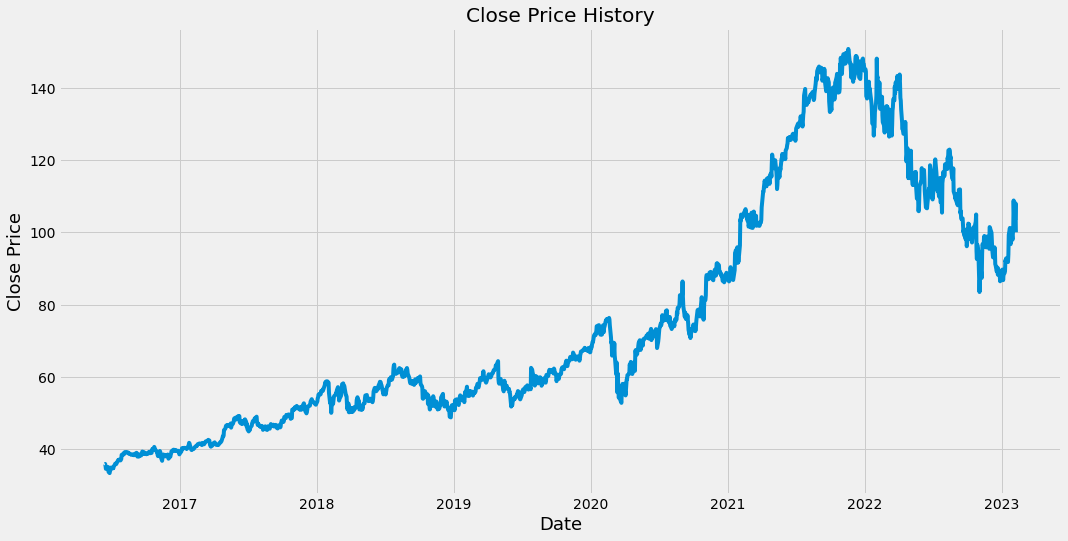

In [103]:
# visualizing  the closing Price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel("Date",fontsize=18)
plt.ylabel("Close Price",fontsize=18)

In [118]:
# Create new dataframe with only the Close price
data = df.filter(['Close'])
# Convert the dataframe to numpu array
dataset = data.values
# get the number of rows  to train model on
training_data_len = math.ceil(len(dataset) * 0.95)
print("Training Data length is : ",training_data_len)

Training Data length is :  1593


In [119]:
#Scale the Date 
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.02131789],
       [0.02159495],
       [0.01794608],
       ...,
       [0.59726676],
       [0.63622802],
       [0.56768348]])

In [120]:
# Created the training dataset
train_data = scaled_data[ 0 :training_data_len,:]
#Split data into x_train and y_train datesets
x_train = []
y_train = []

for i in range(60,len(train_data)):
  x_train.append(train_data[ i-60:i , 0 ])
  y_train.append(train_data[ i , 0 ])
  if i<=60:
    print(x_train)
    print(y_train)
    print()

[array([0.02131789, 0.02159495, 0.01794608, 0.01000034, 0.01084865,
       0.01179923, 0.01244717, 0.014327  , 0.00296688, 0.        ,
       0.00502149, 0.00675644, 0.01016234, 0.01319312, 0.01137723,
       0.0125793 , 0.011552  , 0.01592981, 0.01996234, 0.02232815,
       0.02076798, 0.02246029, 0.02199139, 0.02792935, 0.0292849 ,
       0.03108805, 0.02999677, 0.03174876, 0.03048271, 0.02990727,
       0.03133528, 0.03310005, 0.04285313, 0.0445966 , 0.04382505,
       0.04472448, 0.04405524, 0.04857797, 0.0483819 , 0.04944758,
       0.04962661, 0.04969907, 0.04900424, 0.04867177, 0.0464125 ,
       0.04759327, 0.04656597, 0.04567932, 0.0442854 , 0.04425557,
       0.04321546, 0.04311744, 0.04317285, 0.0442854 , 0.04298101,
       0.04211143, 0.04284887, 0.0439913 , 0.04766576, 0.04778086])]
[0.04563668475831445]



In [121]:
# Convert the X_train and y_train dataset to numpy arrays
x_train , y_train = np.array(x_train), np.array(y_train)

In [122]:
# reshape the data
print(x_train.shape)
x_train =np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
print(x_train.shape)

(1533, 60)
(1533, 60, 1)


In [109]:
# bulid the lstm Model
model = Sequential()
model.add(LSTM(64,return_sequences= True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(64,return_sequences= True))
model.add(Dense(25))

model.add(LSTM(32,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(32,return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(16))

model.add(Dense(1))

model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_27 (LSTM)              (None, 60, 64)            16896     
                                                                 
 dropout_18 (Dropout)        (None, 60, 64)            0         
                                                                 
 lstm_28 (LSTM)              (None, 60, 64)            33024     
                                                                 
 dense_18 (Dense)            (None, 60, 25)            1625      
                                                                 
 lstm_29 (LSTM)              (None, 60, 32)            7424      
                                                                 
 dropout_19 (Dropout)        (None, 60, 32)            0         
                                                                 
 lstm_30 (LSTM)              (None, 32)              

In [125]:
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(100, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_32 (LSTM)              (None, 60, 100)           40800     
                                                                 
 lstm_33 (LSTM)              (None, 100)               80400     
                                                                 
 dense_21 (Dense)            (None, 25)                2525      
                                                                 
 dense_22 (Dense)            (None, 1)                 26        
                                                                 
Total params: 123,751
Trainable params: 123,751
Non-trainable params: 0
_________________________________________________________________


In [126]:
# Compile the Model
model.compile(optimizer = 'adam',loss='mean_squared_error')

In [127]:
#train model
hist = model.fit(x_train,y_train,batch_size=16,epochs=30)

Epoch 1/30
96/96 [==============================] - 10s 63ms/step - loss: 0.0054
Epoch 2/30
96/96 [==============================] - 6s 66ms/step - loss: 7.8420e-04
Epoch 3/30
96/96 [==============================] - 6s 65ms/step - loss: 7.0000e-04
Epoch 4/30
96/96 [==============================] - 6s 66ms/step - loss: 6.1888e-04
Epoch 5/30
96/96 [==============================] - 6s 62ms/step - loss: 6.7517e-04
Epoch 6/30
96/96 [==============================] - 6s 66ms/step - loss: 6.0514e-04
Epoch 7/30
96/96 [==============================] - 6s 62ms/step - loss: 6.5848e-04
Epoch 8/30
96/96 [==============================] - 6s 68ms/step - loss: 6.5960e-04
Epoch 9/30
96/96 [==============================] - 6s 62ms/step - loss: 5.6456e-04
Epoch 10/30
96/96 [==============================] - 6s 66ms/step - loss: 6.5934e-04
Epoch 11/30
96/96 [==============================] - 6s 61ms/step - loss: 5.4100e-04
Epoch 12/30
96/96 [==============================] - 6s 68ms/step - loss: 4.7

In [128]:
# create the testing data set
# create a new array contaning scaled values from index 947 to 1006
test_data = scaled_data[training_data_len -60 : ,:]

#create dataset x_test and y_test 
x_test = []
y_test = dataset[training_data_len :, :]

for i in range (60, len(test_data)):
  x_test.append(test_data[i-60:i,0])




In [129]:
# Convert data to numpy array 
x_test = np.array(x_test)

In [130]:
# reshape the data
# reshape the data
print(x_test.shape)
x_test =np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
print(x_test.shape)

(83, 60)
(83, 60, 1)


In [131]:
# Get the model Predicted price Values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

3/3 [==============================] - 1s 19ms/step


In [132]:
# Get root squared Error (RMSE)  Lower Value is better
rmse = np.sqrt(np.mean(predictions - y_test) **2 )
rmse

3.18304976497788

<ipython-input-133-e6ed9677e2bc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


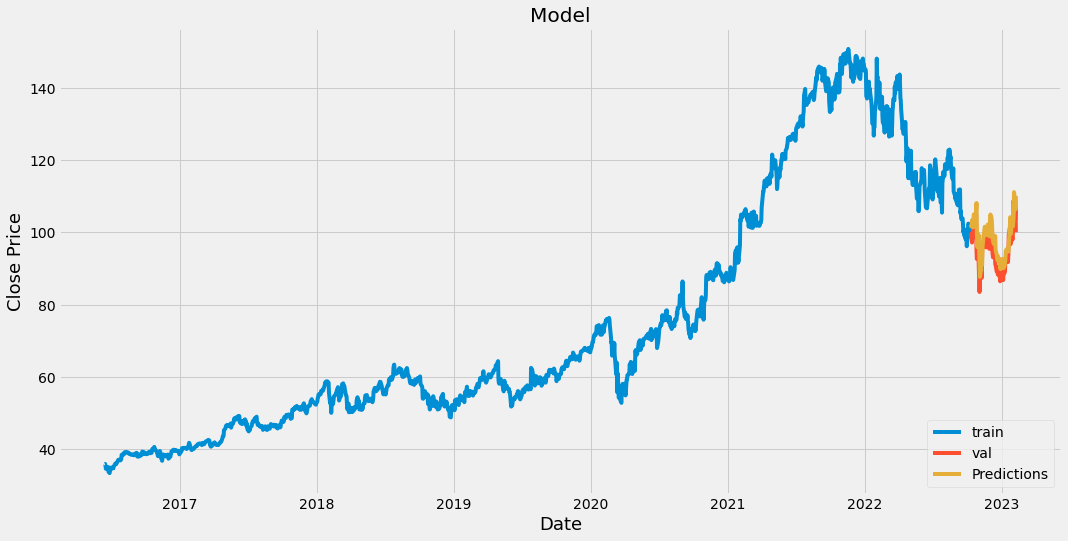

In [133]:
# plot the Data
train = data[:training_data_len]
valid = data[training_data_len :]
valid['Predictions'] = predictions

# Visualize data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel("Date",fontsize=18)
plt.ylabel("Close Price",fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['train','val','Predictions'],loc='lower right')
plt.show()

In [134]:
valid

,Close,Predictions
Date,,
2022-10-11,98.050003,102.043106
2022-10-12,98.300003,101.635178
2022-10-13,99.709999,102.003525
2022-10-14,97.180000,103.365517
2022-10-17,100.779999,101.403793
...,...,...
2023-02-02,108.800003,104.444008
2023-02-03,105.220001,111.106667
2023-02-06,103.470001,109.060379
